In [10]:
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['font.serif'] = ['KaiTi']
# mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题,或者转换负号为字符串
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['KaiTi', 'Arial']})
import re    #  正则表达式

In [7]:
download_url='https://movie.douban.com/top250'
headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.80 Safari/537.36'}
data=pd.DataFrame(columns=['name','score','year'])
def download(data,url):
    element={}
    html=requests.get(url,headers).content
    soup=BeautifulSoup(html)
    #print(soup)
    movie_list=soup.find('ol',attrs={'class':'grid_view'})   
    for movie_li in movie_list.find_all('li'):
        #爬取名字
        detail1=movie_li.find('div',attrs={'class':'hd'})
        movie_name=detail1.find('span',attrs={'class':'title'}).getText()
        element['name']=movie_name
        #爬取评分
        detail2=movie_li.find('div',attrs={'class':'bd'})
        s=detail2.find('span',attrs={'class':'rating_num'}).getText()
        element['score']=float(s)
        #print(detail2)
        #爬取年份
        detail3=movie_li.find('p').getText()
        year=re.search('\d\d\d\d',detail3).group()
        element['year']=int(year)
        data=data.append(element,ignore_index=True)
        #切换到下一页
        tail=soup.find('span',attrs={'class':'next'}).find('a')
    if tail:
        return data,download_url+tail['href']
    return data,None




url=download_url
while url:
    print('正在从',url,'获取数据')
    data,url=download(data,url)

正在从 https://movie.douban.com/top250 获取数据
正在从 https://movie.douban.com/top250?start=25&filter= 获取数据
正在从 https://movie.douban.com/top250?start=50&filter= 获取数据
正在从 https://movie.douban.com/top250?start=75&filter= 获取数据
正在从 https://movie.douban.com/top250?start=100&filter= 获取数据
正在从 https://movie.douban.com/top250?start=125&filter= 获取数据
正在从 https://movie.douban.com/top250?start=150&filter= 获取数据
正在从 https://movie.douban.com/top250?start=175&filter= 获取数据
正在从 https://movie.douban.com/top250?start=200&filter= 获取数据
正在从 https://movie.douban.com/top250?start=225&filter= 获取数据


Text(0, 0.5, '电影数目')

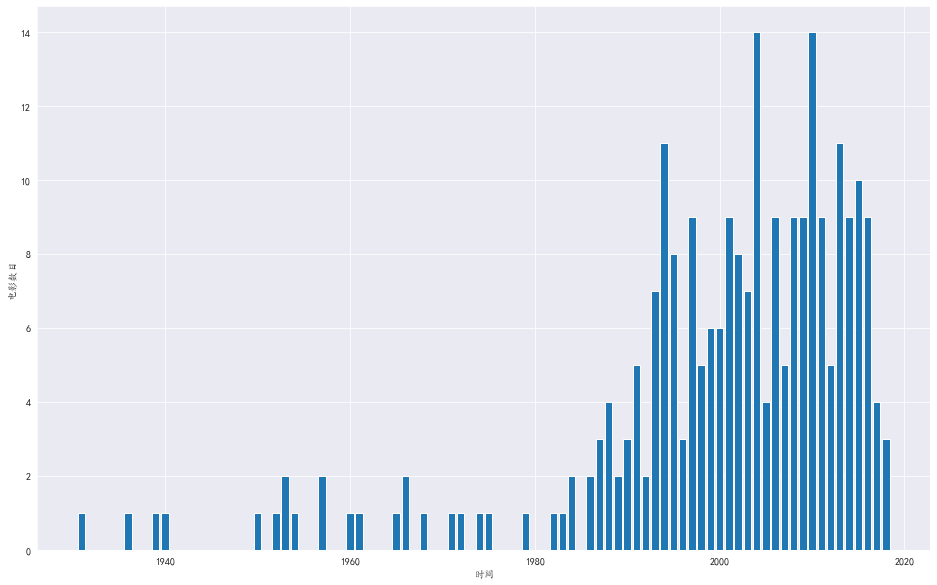

In [8]:
a=data['year'].value_counts()
year=np.array(list(int(x) for x in a.index))
times=np.array(list(x for x in a.values))
plt.figure(1,(16,10))
plt.bar(year,times)
plt.xlabel('时间')
plt.ylabel('电影数目')